In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime 

In [2]:
#To supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format

#To increase the maximum number of columns and rows displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [3]:
loan = pd.read_csv('loan.csv')
loan.head()

/Users/charu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Treating the dataset for Missing Values

#### Calculating the percentage of missing values in the columns. Columns where the percentage is 30 and above, will be dropped.

In [4]:
#Droppimg the columns where all values are null

loan.dropna(axis = 1, how = 'all', inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [5]:
#Calculating percentage of null values

na_percentage = round(100*(loan.isnull().sum()/len(loan.index)), 2)

#Filtering those rows that have more than 0% of null/na values
na_percentage[na_percentage > 0]

emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
mths_since_last_delinq       64.66
mths_since_last_record       92.99
revol_util                    0.13
last_pymnt_d                  0.18
next_pymnt_d                 97.13
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [6]:
#Since we have good number of columns with more than 30% of null values. Hence, we will now drop the columns

loan.drop(na_percentage[na_percentage > 30].index, axis = 1, inplace = True)

In [7]:
#Now finding those columns who have singular values, therefore, will not contribute towards our goal.

loan.nunique().sort_values().head(n=20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

#### Note: The following columns will be dropped, as these columns have only singular value.

1. tax_liens 
2. delinq_amnt 
3. chargeoff_within_12_mths 
4. acc_now_delinq 
5. application_type 
6. policy_code 
7. collections_12_mths_ex_med 
8. initial_list_status 
9. pymnt_plan 



In [8]:
loan.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'],axis=1, inplace = True)


In [9]:
loan.nunique().sort_values(ascending = False).head(n=20)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
dtype: int64

#### Note: The following columns can be removed

These have unique categorical values, that do not contribute towards our goal.
emp_title, emp_title, zip_code, addr_state.
'desc' - Text column, from which, no useful data can be interpreted.


To be removed as this column has data related to individual's investment:

out_prncp_inv, total_pymnt_inv, out_prncp - To be removed as this column has data related to individual's investment.

To be removed as this column has data related to post loan is given:

total_rec_prncp, total_rec_late_fee, total_rec_int.

To be removed as this column has data related to post Charge Off:

recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d.
 

In [10]:
#dropping the columns
loan.drop(['id', 'url'], axis=1, inplace=True)
loan.drop(['emp_title', 'title','zip_code','addr_state'], axis=1, inplace=True)

loan.drop(['out_prncp_inv','total_pymnt_inv','total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d','last_pymnt_d','out_prncp'], axis=1, inplace=True)


In [11]:
loan.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [12]:
#checking the columns for missing values again

loan.isna().sum()

member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
total_pymnt                0
last_pymnt_amnt            0
pub_rec_bankruptcies     697
dtype: int64

In [13]:
#Removing missing values from these remaining columns

loan.dropna(subset = ['emp_length','revol_util','pub_rec_bankruptcies'], inplace = True)
loan.isna().sum()

member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
total_pymnt             0
last_pymnt_amnt         0
pub_rec_bankruptcies    0
dtype: int64

In [14]:
#checking the datatype of the columns

loan.dtypes

member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: object

## Creating Derived Variables

To analyse the data at a more granular level, we need to derive variables from the existing columns

In [15]:
#Deriving Point-of-Time variables from the columns - "issue_d" and "earliest_cr_line"

loan['issue_d'] = pd.to_datetime(loan['issue_d'], format = '%b-%y')
loan['issue_d_year'] = loan['issue_d'].dt.strftime('%Y')
loan['issue_d_month'] = loan['issue_d'].dt.strftime('%b')
loan['issue_d_weekday'] = loan['issue_d'].dt.day_name()

#data type conversion of year and weekday
loan['issue_d_year'] = loan['issue_d_year'].astype(object)
loan['issue_d_weekday'] = loan['issue_d_weekday'].astype(object)

#earliest_cr_line
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format = '%b-%y')

loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.strftime('%Y')
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.strftime('%b')

#data type conversion of year and weekday
#loan['earliest_cr_line_year'] = loan['earliest_cr_line_year'].astype(object)



In [16]:
loan.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month
0,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,5863.16,171.62,0.00,2011,Dec,Thursday,1985,Jan
1,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,1008.71,119.66,0.00,2011,Dec,Thursday,1999,Apr
2,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,3005.67,649.91,0.00,2011,Dec,Thursday,2001,Nov
3,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1996-02-01,1,10,0,5598,21%,37,12231.89,357.48,0.00,2011,Dec,Thursday,1996,Feb
4,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,2011-12-01,Current,other,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,3513.33,67.79,0.00,2011,Dec,Thursday,1996,Jan


####  Since the data has 3 types of Loan_status (Fully Paid, Charged-Off and Current), we will move forwards with Fully Paid and Charged-Off, as these individuals have either completed their loan, or are yet to take a loan respectively, whereas 'Current' are the ones who are paying a Loan.

In [17]:
loan = loan[loan['loan_status'] != 'Current']

## Univariate Analysis

### Loan Amount

/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


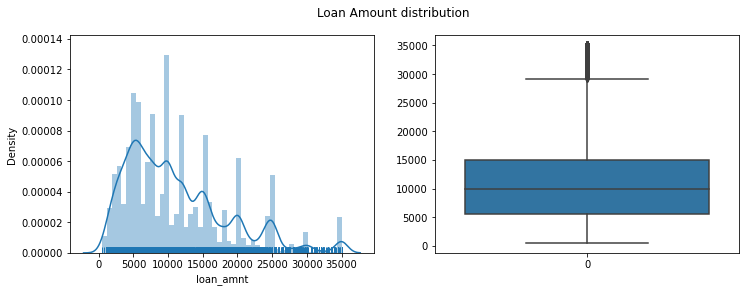

In [18]:
#Set the size of plot
plt.figure(figsize=(12,4))

#Setting index of the subplot 
plt.subplot(1,2,1)

#Plotting a Histogram
sns.distplot(a=loan.loan_amnt, rug=True)
plt.subplot(1,2,2)

#Plotting a Box plot
sns.boxplot(data=loan.loan_amnt)

#Adding a title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [19]:
# 5 Point Summary of the variable - Loan Amount
loan['loan_amnt'].describe()

count   36800.00
mean    11149.54
std      7369.86
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

### Insights :

It can be observed from the 5 Point Summary, that,
1. Most of the individuals borrowed loan between 6000-15000
2. Only 25% of the individuals borrowed loan more than 35000

### Interest Rate

In [20]:
#Removing the '%' from the data
loan['int_rate'] = loan['int_rate'].str.strip('%').astype(float)

/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


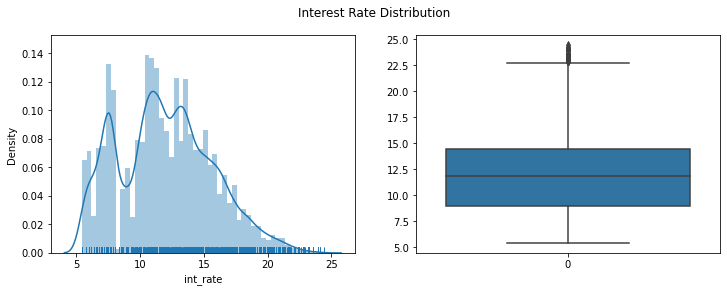

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan['int_rate'], rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan['int_rate'])
plt.suptitle('Interest Rate Distribution')
plt.show()

### Insights:

It can be observed from the above plots, that,
1. The Interest Rate lies mostly lies in the range 9% to 14%
2. Some individuals borrowed loan at 6%
3. Some individuals borrowed loan at 22.5%

## Installment 


/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


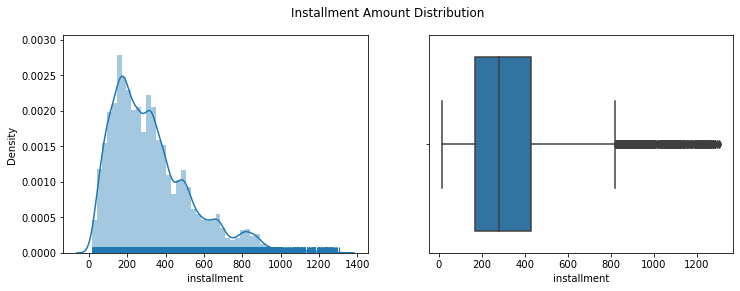

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan['installment'], rug=True)
plt.subplot(1,2,2)
sns.boxplot(loan['installment'])
plt.suptitle('Installment Amount Distribution')
plt.show()

## Insights:

It can be observed, that,
1. The Installment amount range lies between 180 to 420.
2. The maximum amount of Installment paid is 280-290.

### Funded Amount 

/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


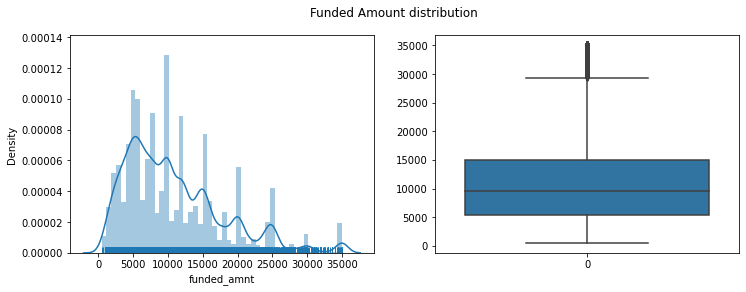

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [24]:
# 5 Point Summary of the variable - Funded Amount
loan['funded_amnt'].describe()

count   36800.00
mean    10880.79
std      7109.16
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

### Insights:
It can be observed, that,
1. The Funded amount trend is similar to that of Loan amount, hence, it can be said that the Lending club approves almost all applied loans.

### Funded Amount Invested

/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


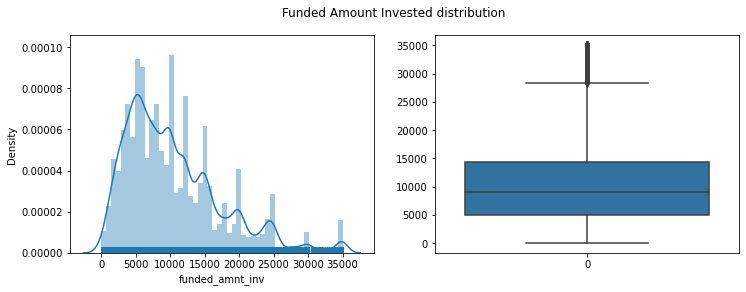

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [26]:
# 5 Point Summary of the variable - Funded Amount
loan['funded_amnt_inv'].describe()

count   36800.00
mean    10439.06
std      7008.52
min         0.00
25%      5000.00
50%      9000.00
75%     14350.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

### Insights:
It can be observed, that,
1.The Funded amount trend is similar to that of Loan amount, hence, it can be said that the Lending club approves almost all applied loans.

## Employment Length               


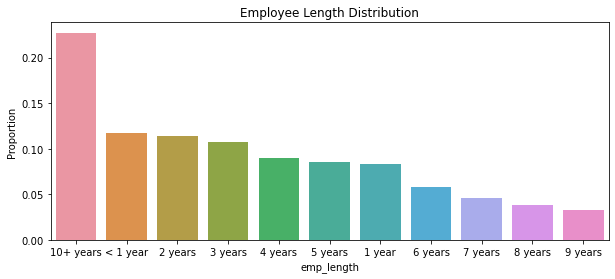

In [27]:
plt.figure(figsize=(10,4))
variable = 'emp_length'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('Employee Length Distribution')
plt.show()

### Insights:
1. Most of the borrowers lie in the employment range of 10+ years

## Home Ownership           


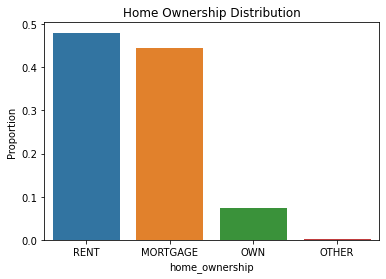

In [28]:
variable = 'home_ownership'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('Home Ownership Distribution')
plt.show()

## Annual Income


/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


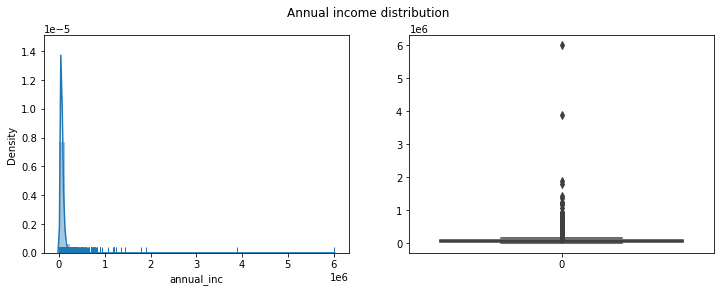

In [29]:
variable = loan['annual_inc']
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=variable, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=variable)
plt.suptitle('Annual income distribution')
plt.show()

In [30]:
# 5-Point Summary of Annual Income
loan['annual_inc'].describe(percentiles=[.3, .6, .9,.99])

count     36800.00
mean      69434.48
std       64021.59
min        4000.00
30%       45000.00
50%       60000.00
60%       66000.00
90%      116738.90
99%      235000.00
max     6000000.00
Name: annual_inc, dtype: float64

### Insights:

1. Around 99% of the individuals have an annual income of less than equal to 235000.
2. Only 1% of the individuals have an annual income between 235000 to 6000000 

## dti                     


/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


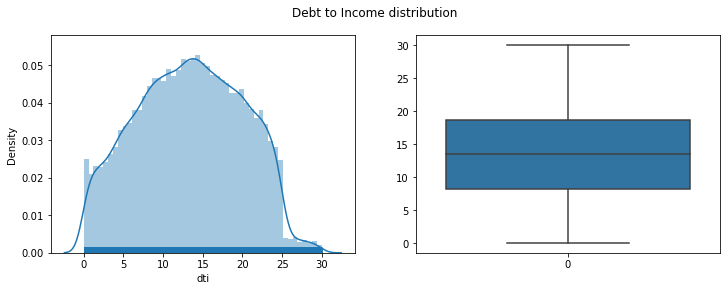

In [31]:
variable = loan['dti']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=variable, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=variable)
plt.suptitle('Debt to Income distribution')
plt.show()

### Insights:

1. It can be observed, that, dti(Debt To Income) ratio of the individuals, who are given the loan, lies between 0-30.

## Pub_rec 

Text(0.5, 1.0, 'Public Derogatory Record Distribution')

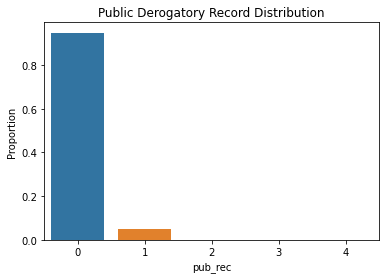

In [32]:
variable = 'pub_rec'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('Public Derogatory Record Distribution')


### Insights:

1. It can be observed that around 90% of the individuals have no public derogatory records.

## pub_rec_bankruptcies     

Text(0.5, 1.0, 'Public Record Bankruptcy Distribution')

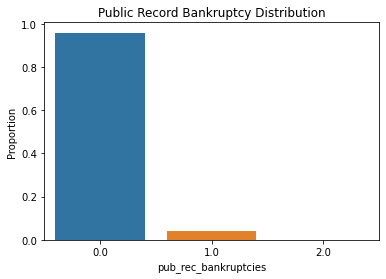

In [33]:
variable = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('Public Record Bankruptcy Distribution')

### Insights:

It can be observed,that,
1. 99% of the individuals were not bankrupt
2. Only 1% were.

## Issue Year         


Text(0.5, 1.0, 'Year of the Issue Date')

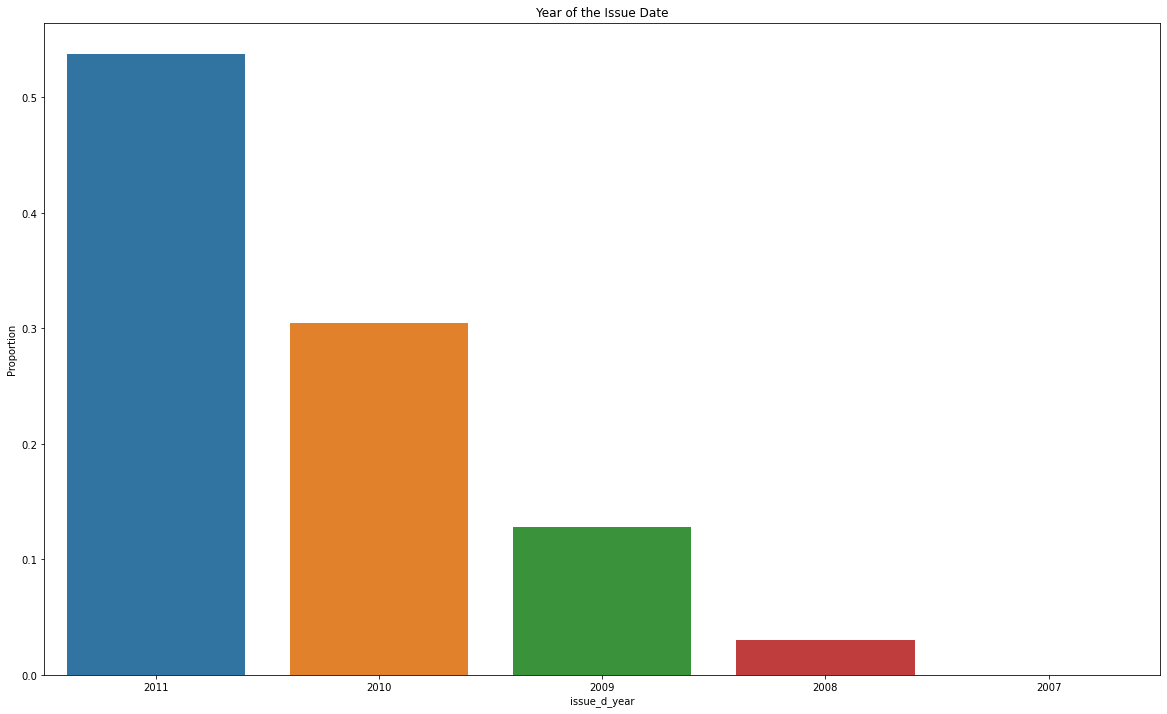

In [34]:
variable = 'issue_d_year'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('Year of the Issue Date')

### Insights:

It can be observed, that,
1. The club has performed well, by increasing the number of loans given each year. Continuous increment is observed.

## Issue Month

Text(0.5, 1.0, 'Month of the Issue Date ')

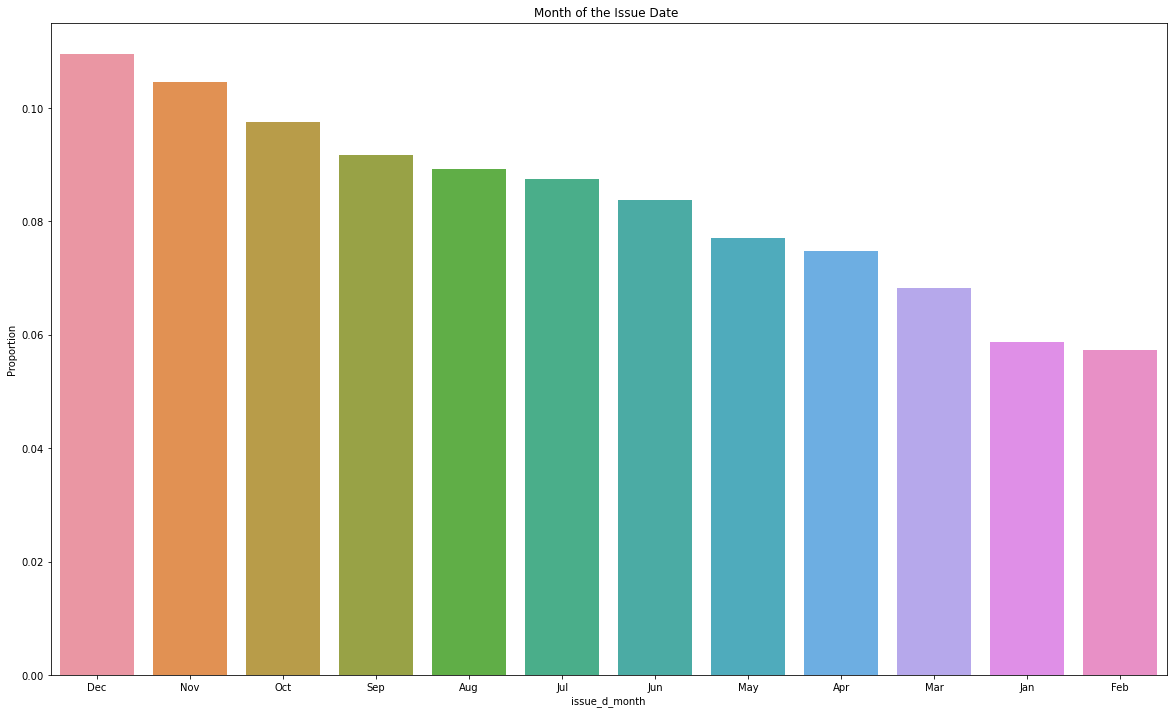

In [35]:
variable = 'issue_d_month'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('Month of the Issue Date ')

### Insights

It can be observed,that,
1. The year starts with low number of loans given, that is, for months - Jan,Feb,March,April and May
2. The year ends on a good note, with maximum number of loans given,that is, for months - Sept,Oct,Nov and Dec.

## Issue WeekDay

Text(0.5, 1.0, ' WeekDay of the Issue Date')

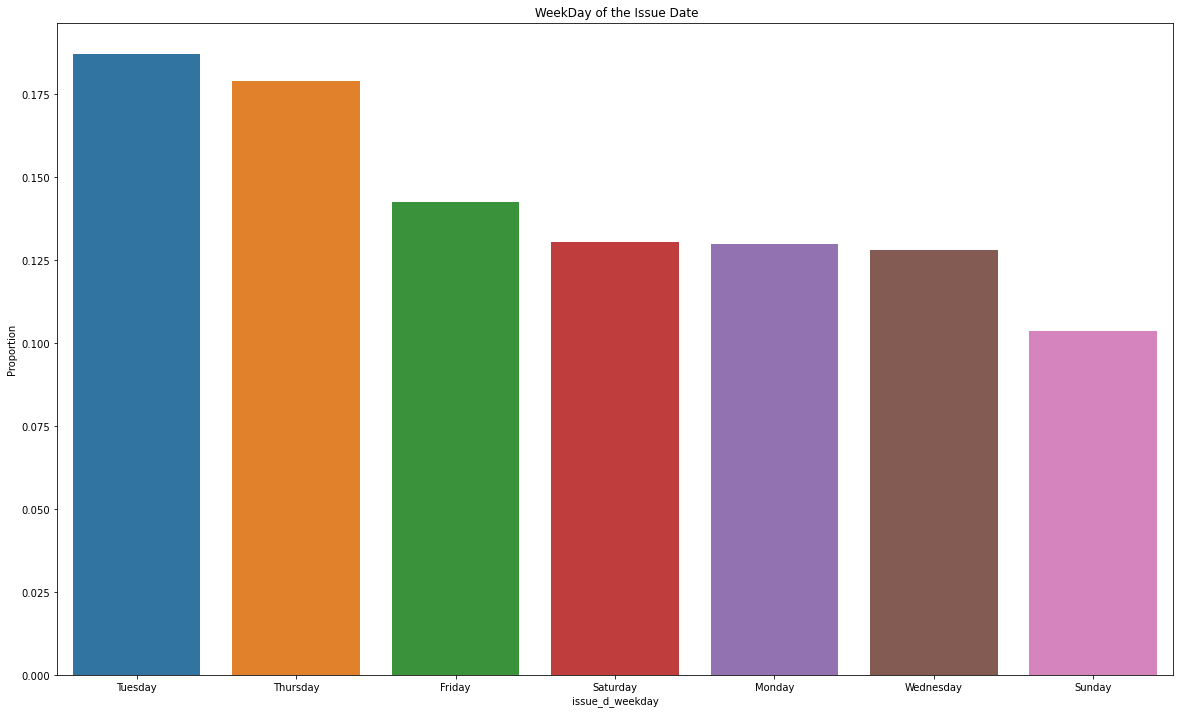

In [36]:
variable = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()


plt.figure(figsize=(20,12))
sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title(' WeekDay of the Issue Date')


### Insights:

It can be observed,that,
1. The Maximum number of loans are given on Tuesdays and Thursday of the week.

## Loan Status              


Text(0.5, 1.0, 'Loan Status')

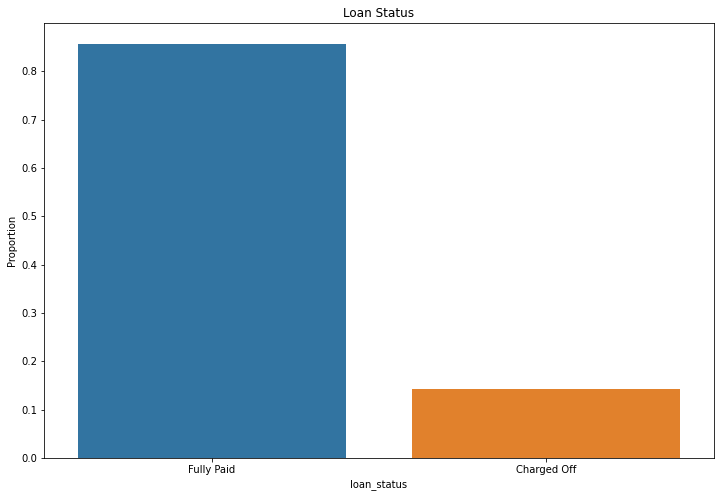

In [37]:
variable = 'loan_status'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()


plt.figure(figsize=(12,8))
sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('Loan Status')

### Insights:

It can be observed,that,
1. Almost 85% of individuals have paid off their loans.
2. ALmost 15% of individuals have defaulter on their loans.

## Purpose                  


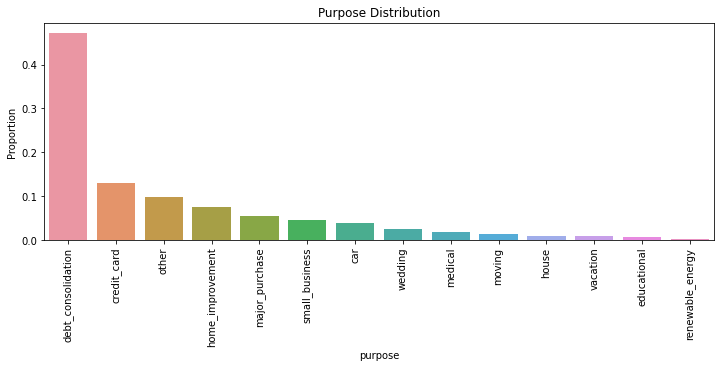

In [38]:
variable = 'purpose'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()

plt.figure(figsize=(12,4))

sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title('Purpose Distribution')
plt.show()

### Insights:

It can be observed,that,
1. The most common reason to borrow a loan, is because of debt consolidation, followed by payment of credit card due payment.
2. The least common reason to borrow a loan, is because of renewable energy

## Verification Status      


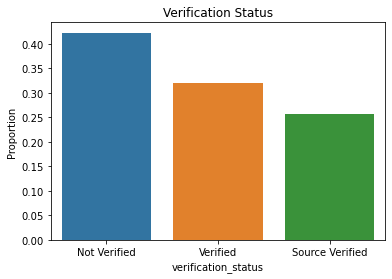

In [39]:
variable = 'verification_status'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('Verification Status')
plt.show()

### Insights:

It can be observed,that,
1. Only 35% of individuals were verfied before giving them a Loan
2. 45% of of individuals were not verfied before giving them a Loan

###  earliest_cr_line_year

/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

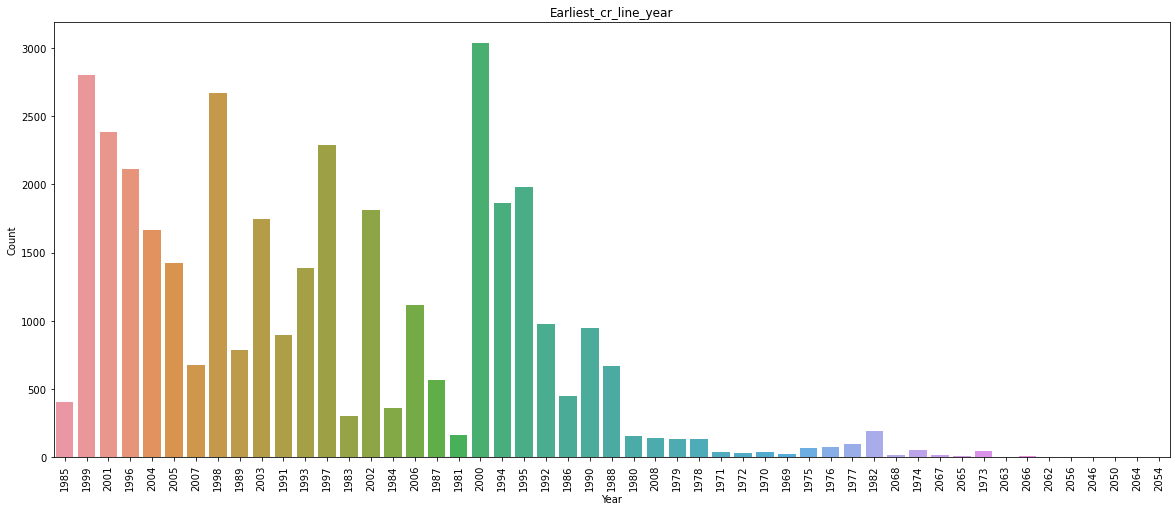

In [40]:
plt.figure(figsize=(20,8))
sns.countplot(loan['earliest_cr_line_year'])
plt.title('Earliest_cr_line_year')
plt.xticks(rotation=90)

plt.xlabel('Year')
plt.ylabel('Count')


### Insights:

It can be observed,that, 
1. The credit line of most individuals is early, that is in the year 2000, followed by, 1999 and 1998.

### earliest_cr_line_month

/Users/charu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

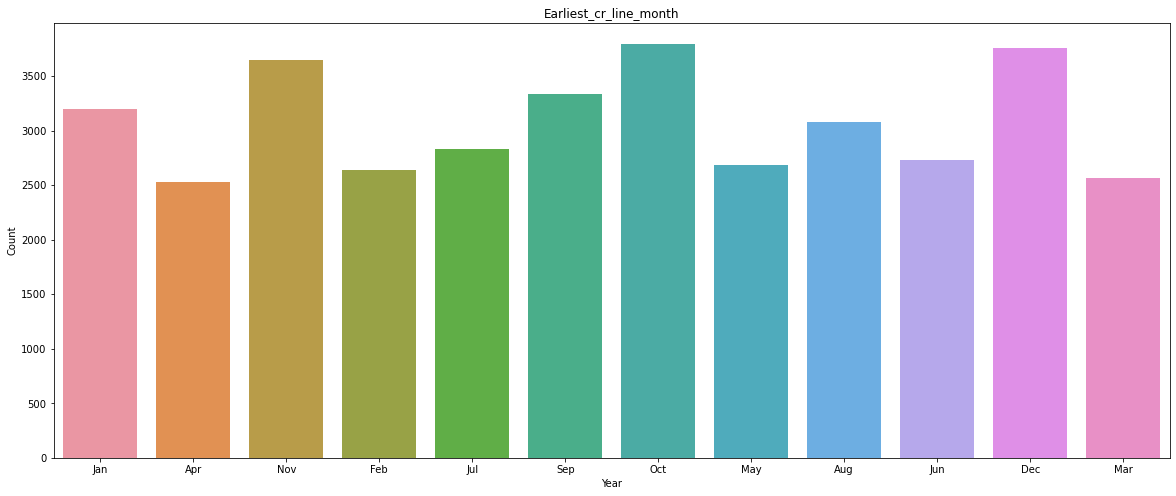

In [41]:
plt.figure(figsize=(20,8))
sns.countplot(loan['earliest_cr_line_month'])
plt.title('Earliest_cr_line_month')

plt.xlabel('Year')
plt.ylabel('Count')


### Insights:
It can be observed,that,

1. Most individuals got early in the month of Oct, followed by Dec,Nov and Sept

## delinq_2yrs               


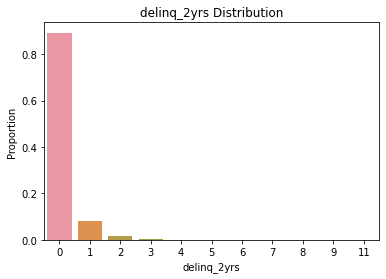

In [42]:
variable = 'delinq_2yrs'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('delinq_2yrs Distribution')
plt.show()

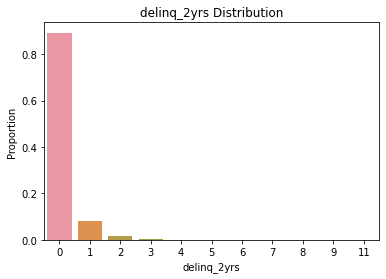

In [43]:
variable = 'delinq_2yrs'
#Probability / Percentage of each values

sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('delinq_2yrs Distribution')
plt.show()

### Insights:

It can be observed,that,
1. 87% of the individuals have 0 days as delinquent.

## Term 

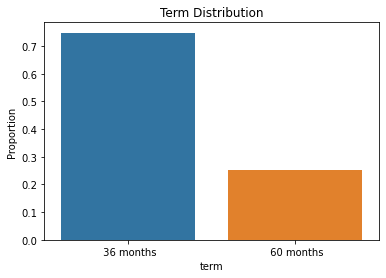

In [44]:
variable = 'term'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('Term Distribution')
plt.show()

### Insights:

It can be observed, that,
1. 75% of the Individuals have opted for a 36 month repayment window
2. 25% of the Individuals have opted for a 60 month repayment window
 
    

### inq_last_6mths            


Text(0.5, 1.0, 'Last 6 months Distribution')

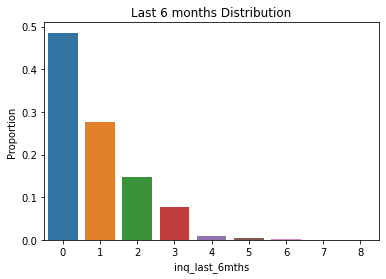

In [45]:

variable = 'inq_last_6mths'

#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('Last 6 months Distribution')

### Insights:

It can be observed, that, in the last 6 months,
1. 48% of the individuals have made 0 inquires.
2. 27% of the individuals have made 1 inquiry.
3. 14% of the individuals have made 2 inquiries.
4. 7% of the individuals have made 3 inquiries.
5. 2% of the individuals have made 4 inquiries.
6. 1% of the individuals have made 5 inquiries.
7. 0.5% of the individuals have made 6 inquiries





## Grade 

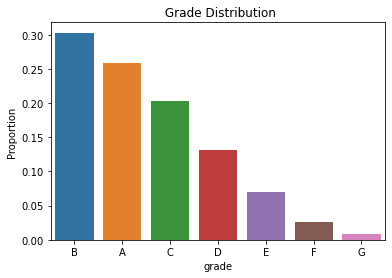

In [46]:
variable = 'grade'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()

loan = loan.sort_values(by="grade", ascending=True)

sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title(' Grade Distribution')
plt.show()

### Insights:

It can be observed, that, 
1. The majority of individuals belong to the B and A grades, followed by C grade

## Sub grade 

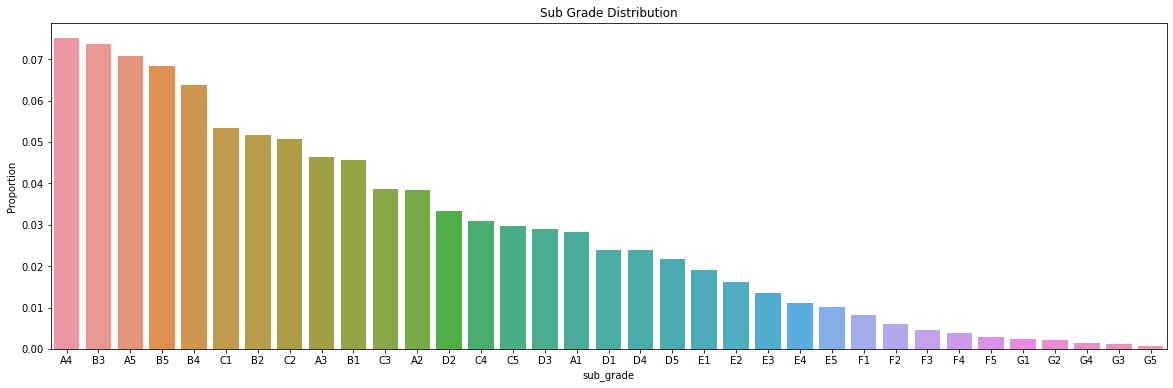

In [47]:
variable = 'sub_grade'
#Probability / Percentage of each values
prob_df = loan[variable].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,6))

sns.barplot(x='index', y=variable, data=prob_df)
plt.xlabel(variable)
plt.ylabel('Proportion')
plt.title('Sub Grade Distribution')
plt.show()

### Insights:

It can be observed, that, 
1. The majority of individuals below to A4,B3,A5,B5,B4 subgrades

# Segmented Univariate Analysis

###  Loan Amount 

#### Loan Amount vs Purpose

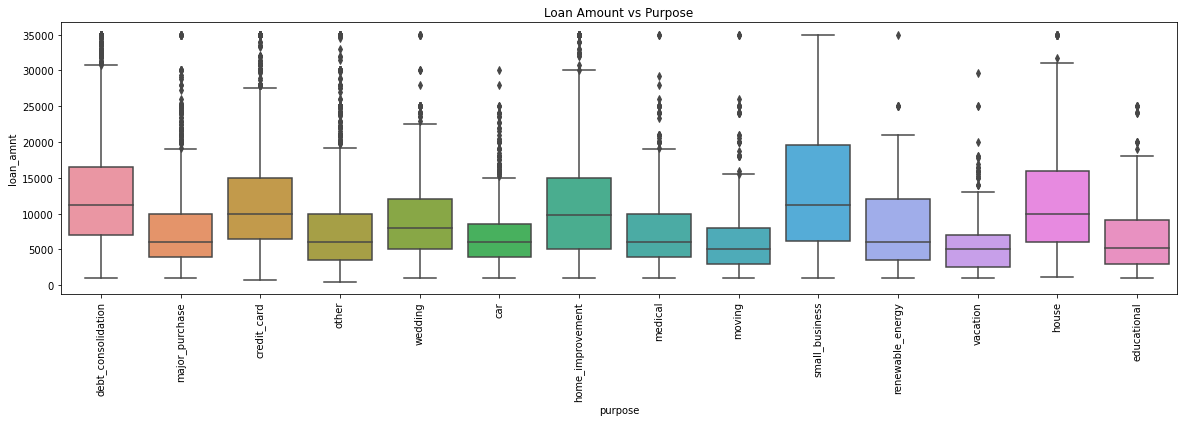

In [48]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.loan_amnt, data=loan)
plt.title('Loan Amount vs Purpose')
plt.xticks(rotation=90)
plt.show()


### Insights:

It can be observed, that,
1. Individuals with small businesses take large amount of loans.

#### Grade vs Funded Amount 

<AxesSubplot:title={'center':'Grade vs funded amount'}, xlabel='grade', ylabel='funded_amnt'>

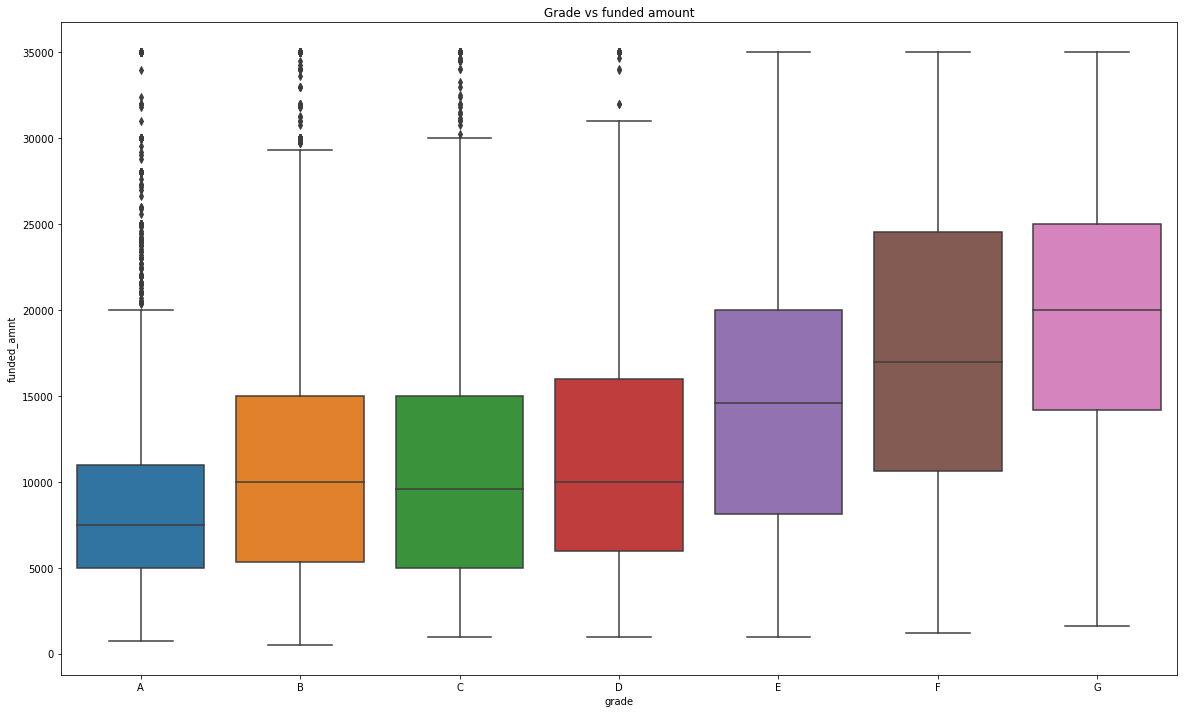

In [49]:
plt.figure(figsize=(20,12))
plt.title('Grade vs funded amount')
order = loan.grade.unique()
order.sort()
sns.boxplot(x='grade', y=loan.funded_amnt, order = order, data=loan)

### Insights:
It can be observed, that,
1. Loan amount has been funded highest for Grade G, followed by F and E.

#### Term, Purpose vs Funded Amount

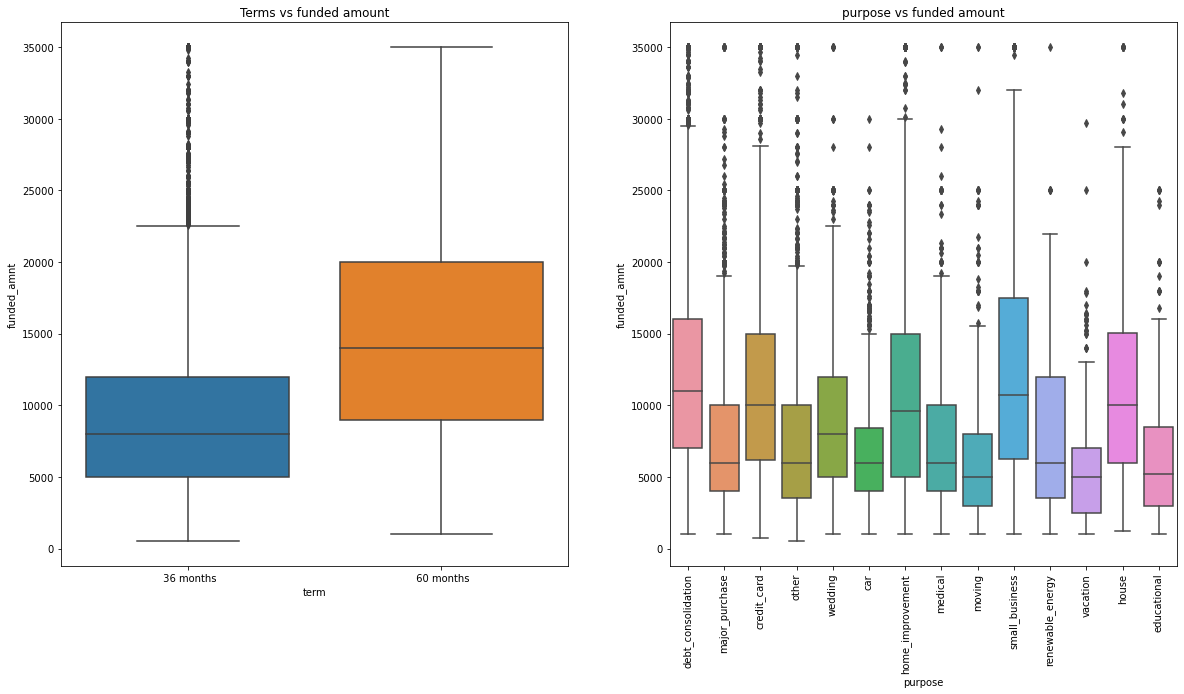

In [50]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.boxplot(x='term', y=loan.funded_amnt, data=loan)
plt.title('Terms vs funded amount')
plt.subplot(122)
sns.boxplot(x='purpose', y=loan.funded_amnt, data=loan)
plt.title('purpose vs funded amount')
plt.xticks(rotation=90)
plt.show()

#### Loan Amount vs Grade

<AxesSubplot:title={'center':'Loan Amount vs Grade'}, xlabel='grade', ylabel='loan_amnt'>

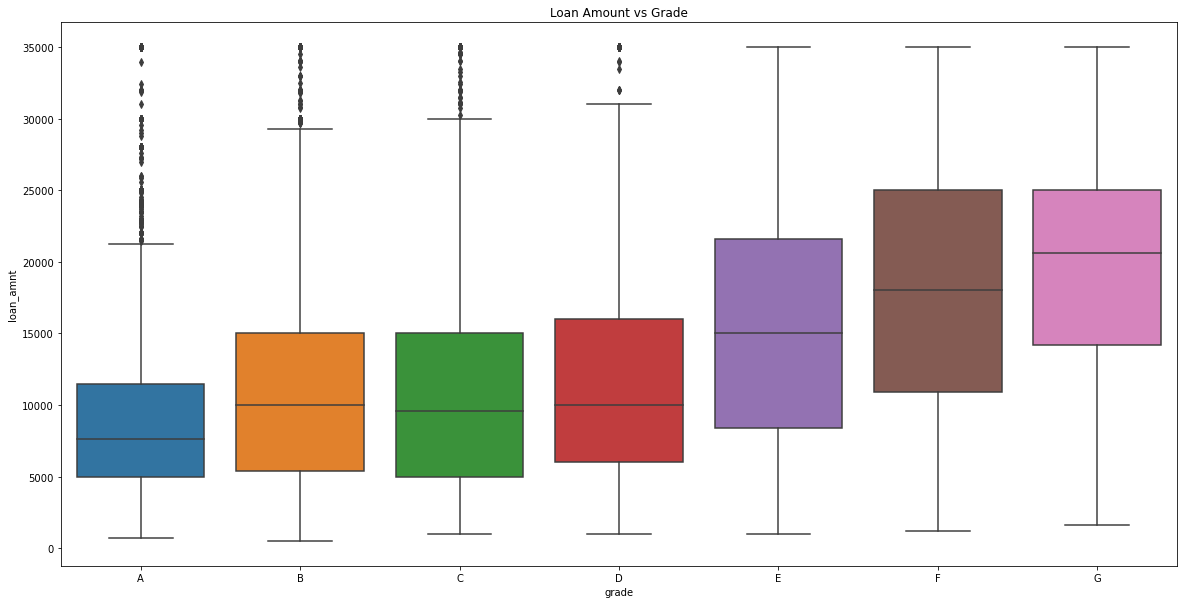

In [51]:
plt.figure(figsize = (20,10))
plt.title('Loan Amount vs Grade')

grade_order = loan['grade'].unique()
grade_order.sort()
sns.boxplot(x='grade', y=loan.loan_amnt, order = grade_order, data=loan)

### Insights:
It can be observed, that,

    1. Individuals from Grade F and G have taken maximum amount of Loan, followed by E,D,C,B and A

#### Loan Amount vs Emp_length 

Text(0.5, 1.0, 'Employee Length vs Loan Amount')

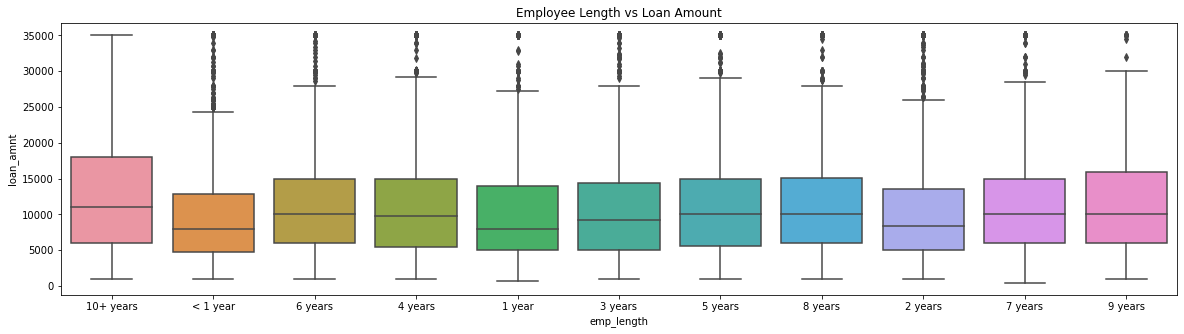

In [52]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.loan_amnt, data=loan)
plt.title('Employee Length vs Loan Amount')

### Insights:

It can be observed, that,
1. Individuals with employment length of 10+ years borrow more loans than their counterparts

#### Loan Amount vs (Term, Verification_status, Loan_status, Home ownership)

Text(0.5, 1.0, 'verification_status vs Loan Amount')

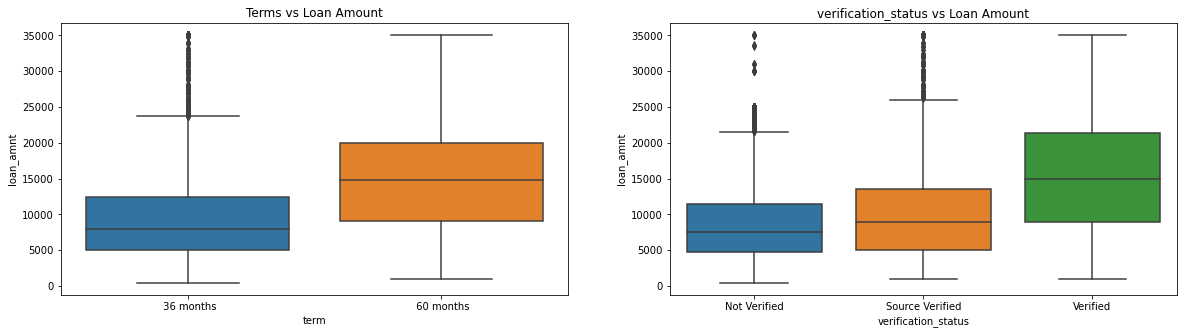

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.loan_amnt, data=loan)
plt.title('Terms vs Loan Amount')

plt.subplot(122)
order = loan.verification_status.unique()
order.sort()
sns.boxplot(x='verification_status', y=loan.loan_amnt, order = order, data=loan)
plt.title('verification_status vs Loan Amount')

Text(0.5, 1.0, 'home_ownership vs Loan Amount')

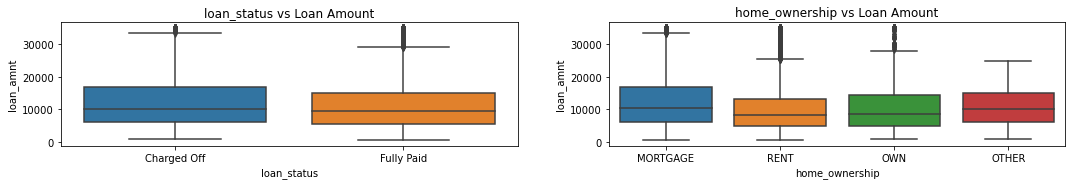

In [54]:
plt.figure(figsize=(18,5))

plt.subplot(221)
sns.boxplot(x='loan_status', y=loan.loan_amnt, data=loan)
plt.title('loan_status vs Loan Amount')

plt.subplot(222)
sns.boxplot(x='home_ownership', y=loan.loan_amnt, data=loan)
plt.title('home_ownership vs Loan Amount')

### Insights:

It can be observed,that,
1. A Loan Amount of higher value is taken for a period of 60 months in maximum cases.
2. A high amount of Loan(9000 - 22000)is mostly given to verified individuals.
3. The Fully paid loans are the ones that lie between a value of 7000-15000, whereas the 'Charged-off' ones lie between 9200-16000
4. The Loan amount is higher for individuals who have mortgages their home, followed by one who own their homes.

## Interest Rate int_rate 

#### int_rate vs (Grade, Term, Purpose, Loan_status, Emp length)

Text(0.5, 1.0, 'Term vs Interest Rate')

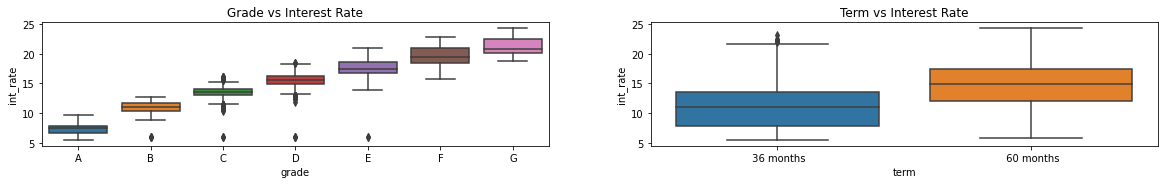

In [55]:
plt.figure(figsize=(20,5))

plt.subplot(221)
plt.title('Grade vs Interest Rate')
order = loan.grade.unique()
order.sort()
sns.boxplot(x='grade', y=loan.int_rate, order = order, data=loan) 

plt.subplot(222)
plt.title('Term vs Interest Rate')
sns.boxplot(x='term', y=loan.int_rate, data=loan)
plt.title('Term vs Interest Rate')


### Insights:
It can be observed,that,
1. The int_rate is higher for Grade G individuals, followed by grade F,E,D,C,B and A.
2. The int_rate is higher when the loan is borrowed for a period of 60 months

Text(0.5, 1.0, 'loan_status vs Interest Rate')

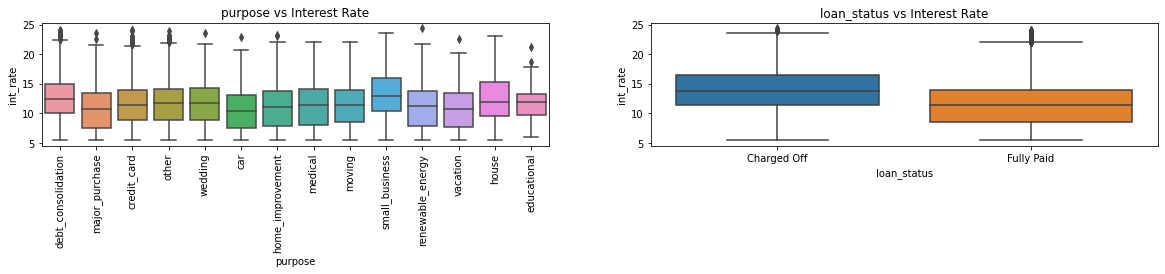

In [56]:
plt.figure(figsize=(20,5))

plt.subplot(221)
plt.title('purpose vs Interest Rate')
sns.boxplot(x='purpose', y=loan.int_rate, data=loan) 
plt.xticks(rotation=90)

plt.subplot(222)
sns.boxplot(x='loan_status', y=loan.int_rate, data=loan)
plt.title('loan_status vs Interest Rate')

### Insights:
It can be observed,that,
1. int_rate is higher for small businesses purpose, followed by house purpose
2. int_rate is higher for Charged-off loans, as they have defaulted.

#### int_rate vs Emp_length 

Text(0.5, 1.0, 'emp_length vs Interest Rate')

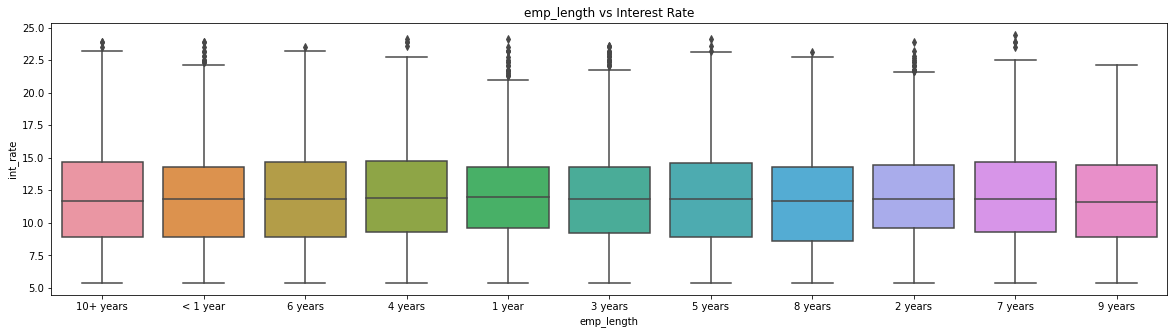

In [57]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.int_rate, data=loan)
plt.title('emp_length vs Interest Rate')

### Insights:

It can be observed,that,
1. int_rate is almost similar for individuals with emp_length of 10+, 6 and 4 years have almost same int_rate.
2. The same is oberved for all other employment lengths.
3. We can say that there is no strong relation between int_rate and emp_length

### Annual income

#### annual income vs (Term, Grade)

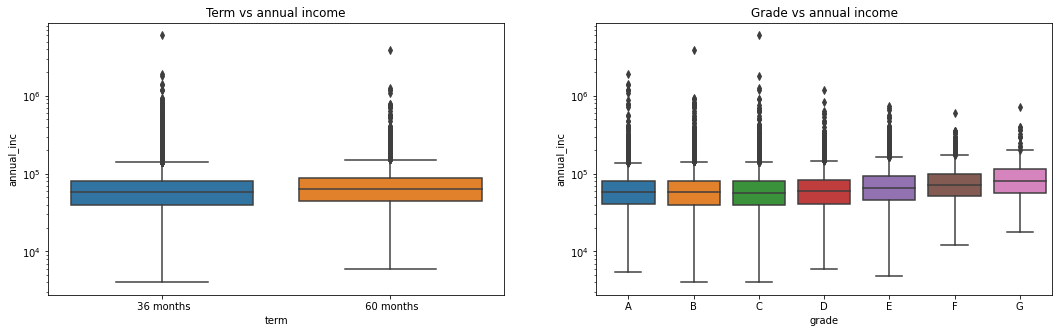

In [58]:
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.annual_inc, data=loan)
plt.title('Term vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
order = loan.grade.unique()
order.sort()
sns.boxplot(x='grade', y=loan.annual_inc, order = order, data=loan)
plt.yscale('log')

### Insights:
It can be observed,that,
1. Annual income is greater for individuals that take a loan for 60 months
2. Annual income is greater for individuals that belong to Grade G, followed by F,E,D, and equal for A,B and C.

#### Annual income vs Loan_status 

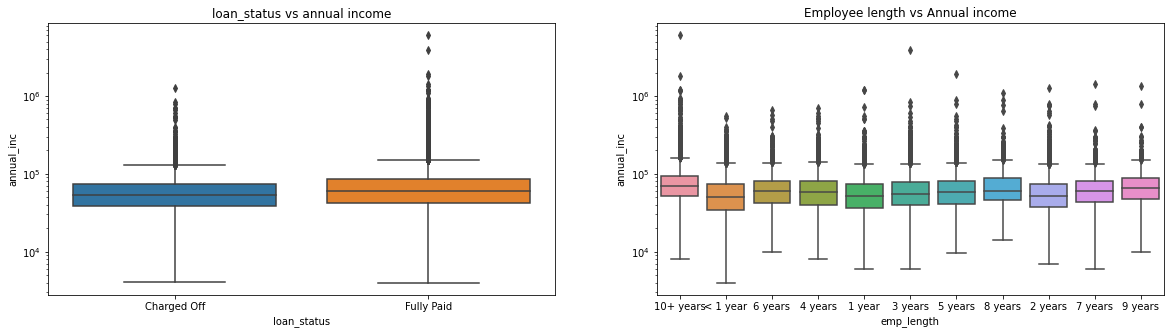

In [59]:
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.boxplot(x='loan_status', y=loan.annual_inc, data=loan)
plt.title('loan_status vs annual income')
plt.yscale('log')

plt.subplot(122)
sns.boxplot(x='emp_length', y=loan.annual_inc, data=loan)
plt.title('Employee length vs Annual income')
plt.yscale('log')

### Insights:
It can be observed,that,
1. Loans that have been Fully Paid, belong to individuals with higher annual income.
2. Loans that have been Charged-Off, belong to individuals with lower annual income.
3. Individuals with employment length of +10 years have higher annual income, followed by 9 and 8 years.

## dti

#### dti vs (Emp_length, Term, Grade, Loan_status, Home ownership, purpose) 

<AxesSubplot:title={'center':'Term vs dti'}, xlabel='term', ylabel='dti'>

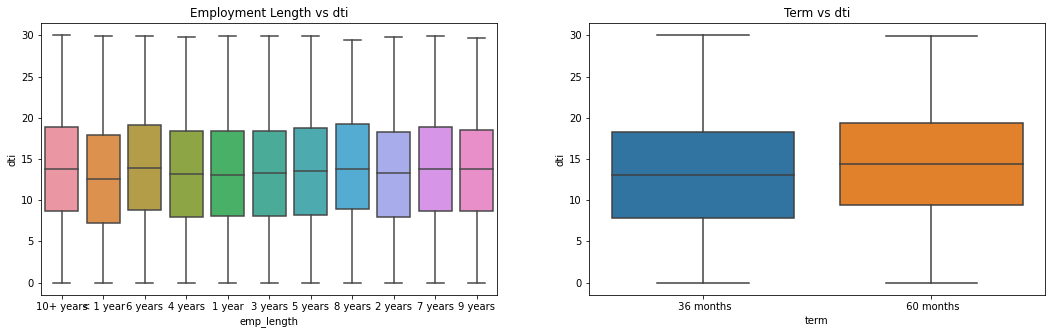

In [60]:
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y=loan.dti, data=loan)
plt.title('Employment Length vs dti')

plt.subplot(122)
plt.title('Term vs dti')
sns.boxplot(x='term', y=loan.dti, data=loan)



<AxesSubplot:title={'center':'Grade vs dti'}, xlabel='grade', ylabel='dti'>

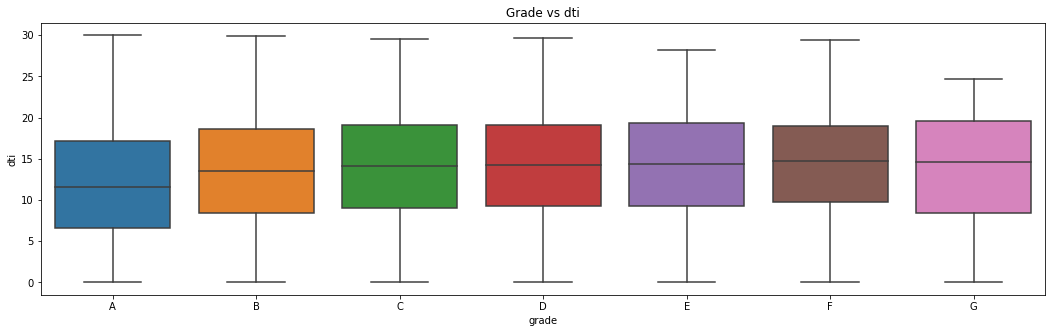

In [61]:
plt.figure(figsize=(18,5))
plt.title('Grade vs dti')
order = loan.grade.unique()
order.sort()
sns.boxplot(x='grade', y=loan.dti, order = order, data=loan)

### Insights:
It can be observed,that, 
1. Individuals with employment length of +10,8 and 6 year have higher dti
2. Individuals taking loan for a duration of 60 months have higher dti.
3. Individuals of grade C,D,E have almost equal dti and higher dti than other grades

Text(0.5, 1.0, 'home_ownership vs dti')

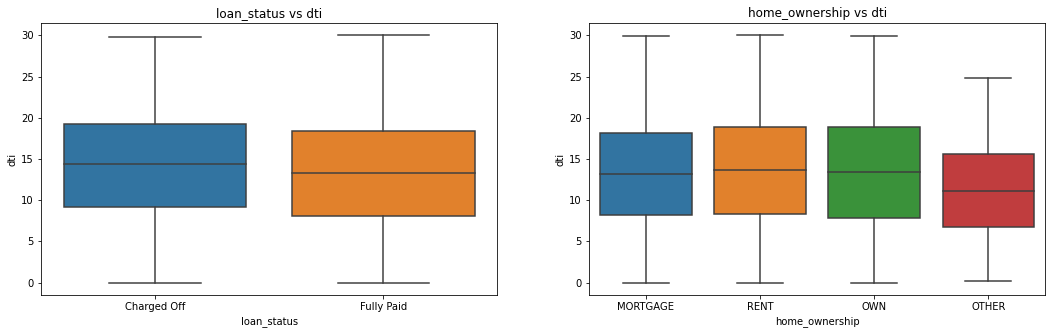

In [62]:
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.boxplot(x='loan_status', y=loan.dti, data=loan)
plt.title('loan_status vs dti')

plt.subplot(122)
sns.boxplot(x='home_ownership', y=loan.dti, data=loan)
plt.title('home_ownership vs dti')


### Insights:
It can be observed,that,
1. Individuals that have charged-off have higher dti, in respect to those who have fully paid their loans
2. Individuals who are in Other category of Home ownership have higher dti than others.

#### Purpose vs dti

Text(0.5, 1.0, 'purpose vs dti')

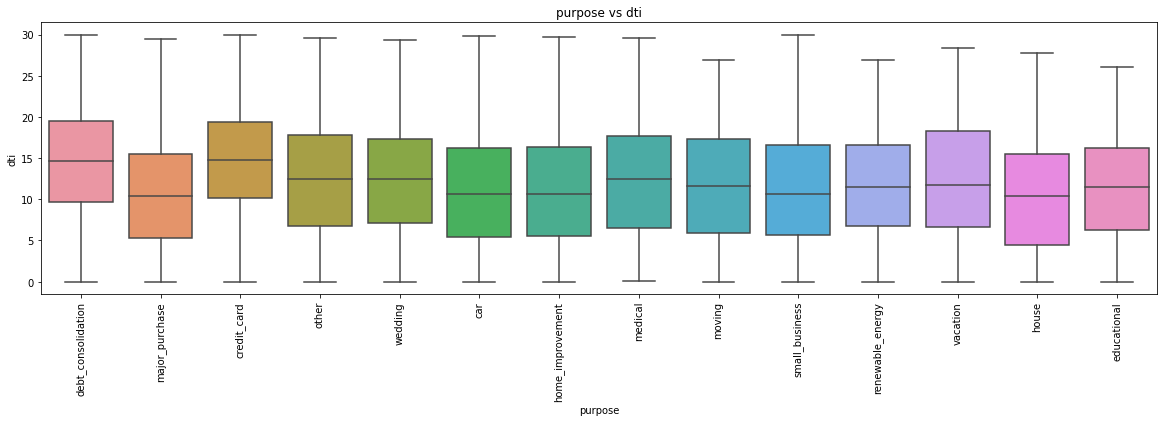

In [63]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.dti, data=loan)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

### Insights:
It can be observed,that,
1. Individuals who take the loan for credit card and debt_consolidation purpose have higher dti, followed by vcation, medical and others.

## Bivariate Analysis 

###  Loan Amount

#### Loan amount vs Annual income 

Text(0.5, 1.0, 'Loan Amount vs Annual Income')

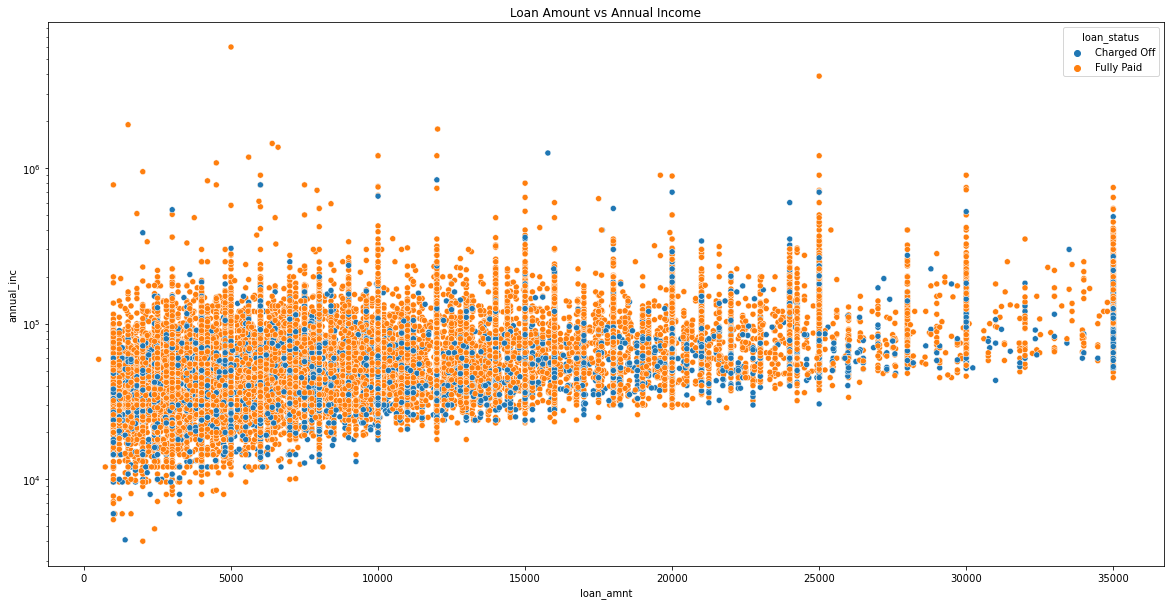

In [64]:
plt.figure(figsize=(20,10))
#plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', hue = 'loan_status',data=loan)

plt.yscale('log')
plt.title('Loan Amount vs Annual Income')


### Insights:
It can be observed,that,
1. There is a similar linear trend seen for both, Fully paid and Charged Off individuals, which means loan_amount and annual_inc are correlated.

#### Loan Amount vs Term  

<Figure size 864x432 with 0 Axes>

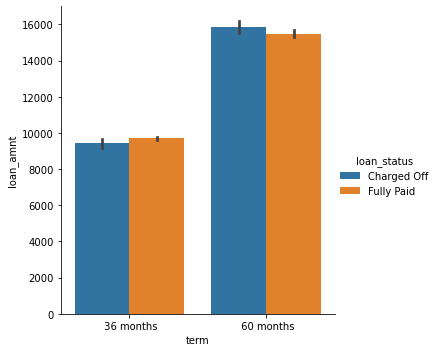

In [65]:
plt.figure(figsize=(12,6))
sns.catplot(x = 'term', y = 'loan_amnt', data = loan,hue = 'loan_status', kind = 'bar')


### Insights:
It can be observed,that,
1. The individuals who 'Fully Paid' and 'Charged Off', have a slightly less loan amount, but it is not significant enough.

#### Loan Amount vs Interest Rate

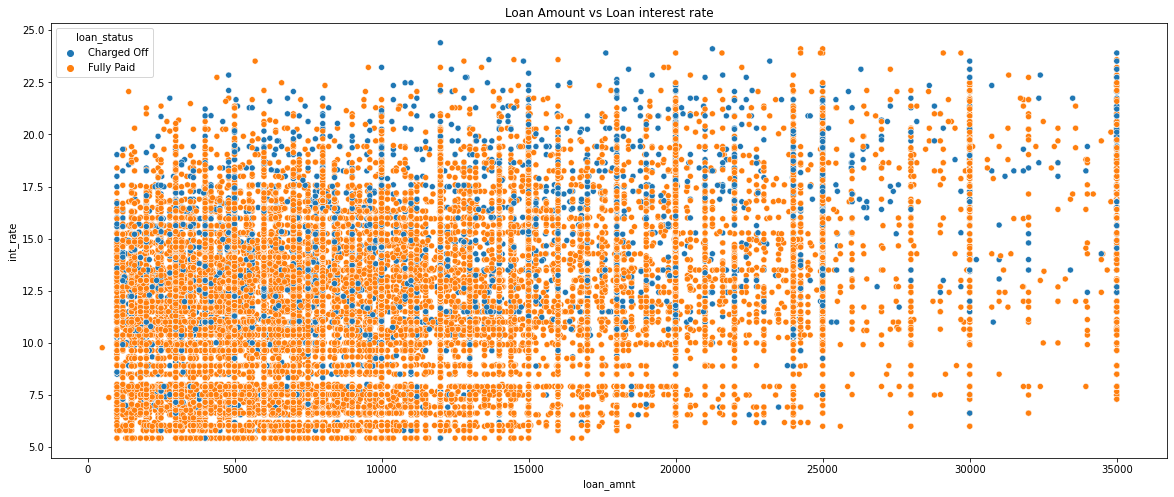

In [66]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()



### Insights:
It can be observed,that,
1. There is no specific pattern or trend in the plot, hence, no relation can be observed.

####  Purpose vs Annual income

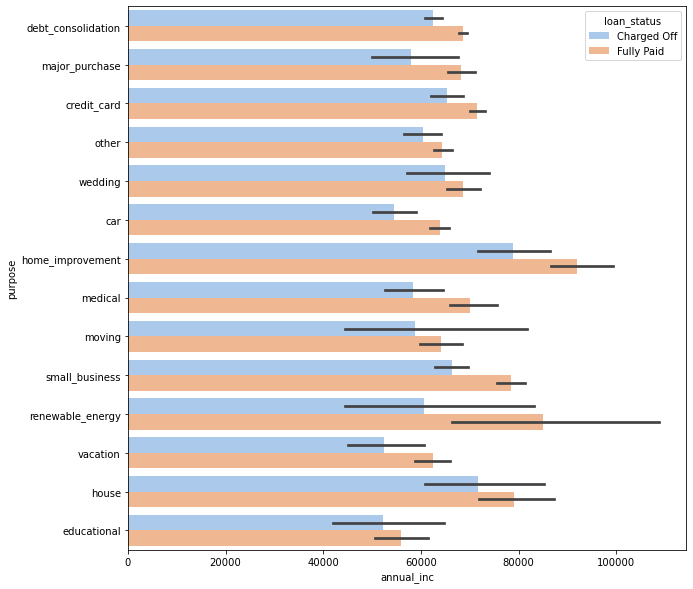

In [67]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

### Insights:
It can be observed,that,
1. Individuals that have Fully Paid their loans, took loans for renewable energy and home improvement.
2. Individuals that have Charged Off, took loans for home improvement and house.

#### Home ownership vs Annual income 

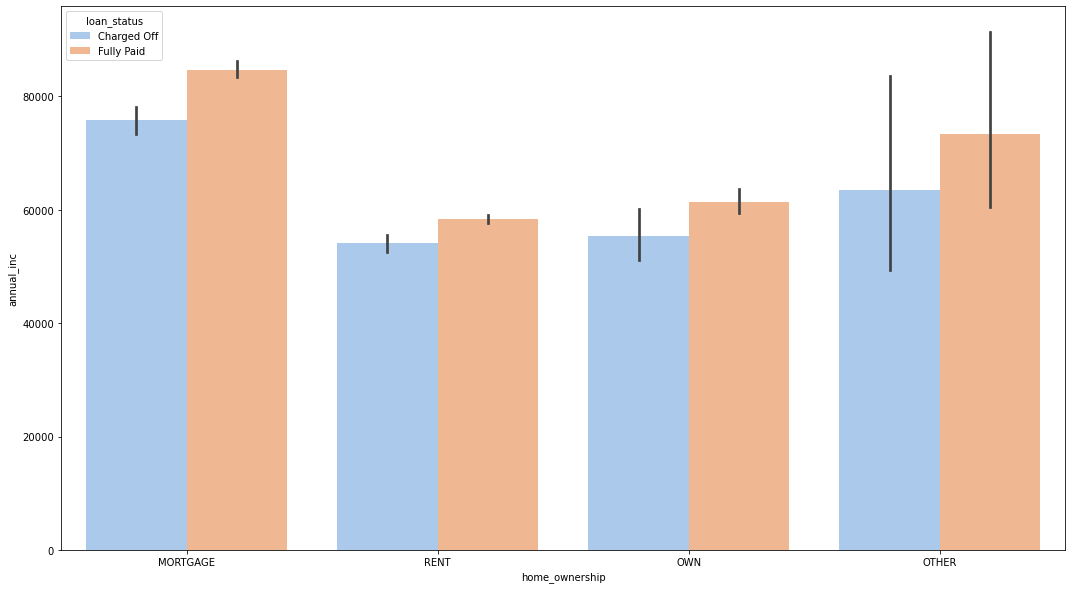

In [68]:
plt.figure(figsize=(18,10))
sns.barplot(data =loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

### Insights:
It can be observed,that,
1. Individuals that mortgage, have both, Fully Paid as well as Charged off, in comparision to others

#### Term vs Interest Rate 

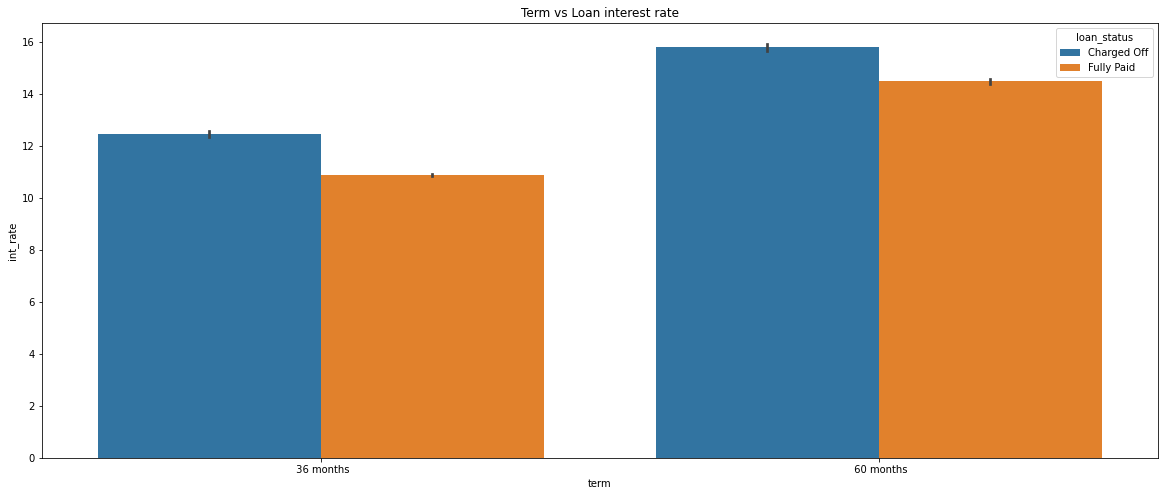

In [69]:
plt.figure(figsize=(20,8))
sns.barplot(x='term', y='int_rate', data=loan, hue='loan_status')
plt.title('Term vs Loan interest rate')
plt.show()


### Insights:
It can be observed,that,
1. For both terms - 36 months and 60 motnhs, the interest rate is higher for Charged off individuals than the ones who Fully Paid.

#### Grade vs Loan interest rate

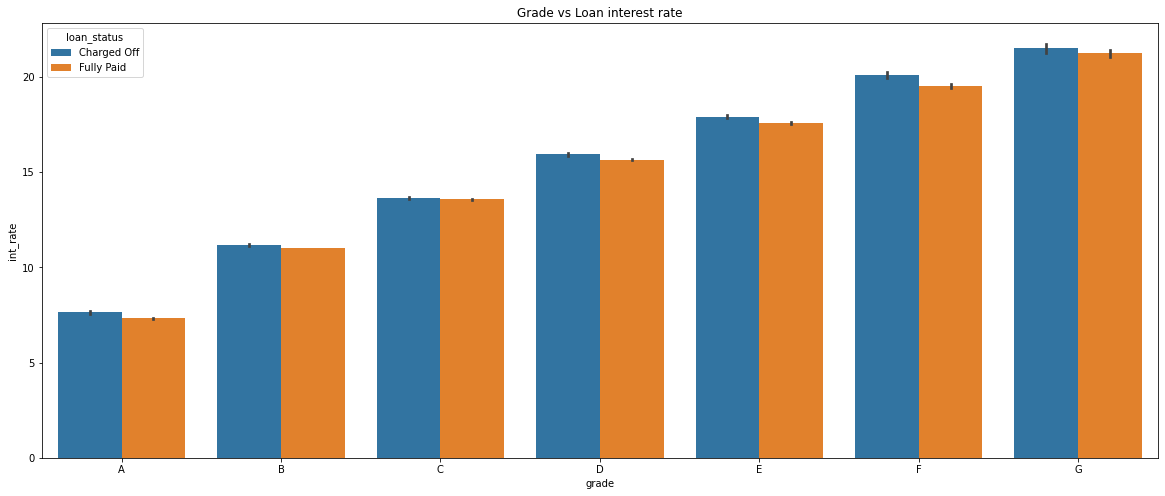

In [70]:
plt.figure(figsize=(20,8))
loan = loan.sort_values(by="grade", ascending=True)

sns.barplot(x='grade', y='int_rate', data=loan, hue='loan_status')
plt.title('Grade vs Loan interest rate')
plt.show()


### Insights:
It can be observed,that,
1. For all the grades, he interest rate is higher for Charged off individuals than the ones who Fully Paid.
2. There is a high interest rate for Grade G individuals, followed by Grades F and E.

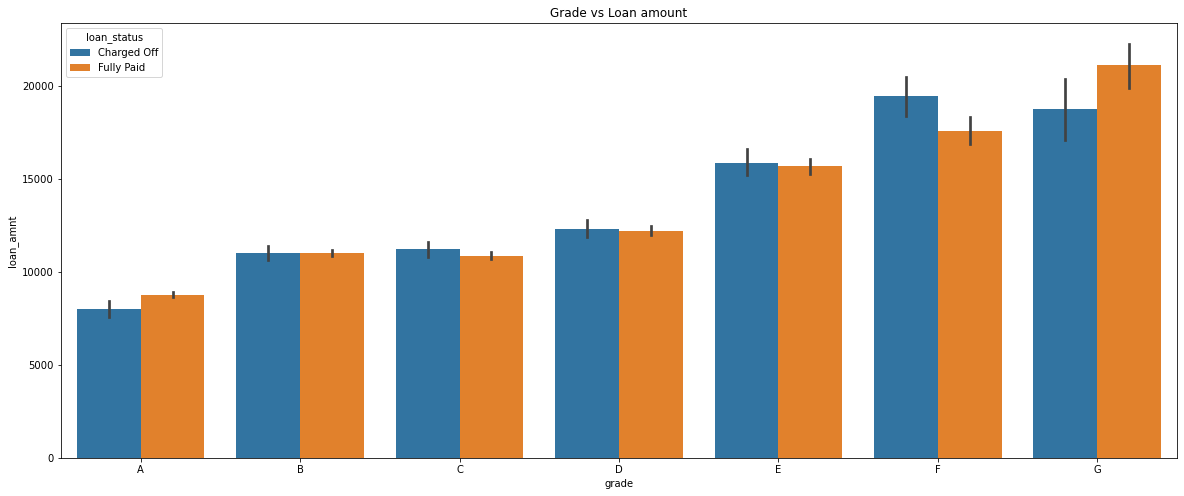

In [71]:
plt.figure(figsize=(20,8))
sns.barplot(x='grade', y='loan_amnt', data=loan, hue='loan_status')
plt.title('Grade vs Loan amount')
plt.show()


### Insights:
It can be observed,that,
1. Grade G individuals have high loan amount, and, have Fully Paid higher as well Charged off higher than others.

#### Home ownership vs Loan amount 

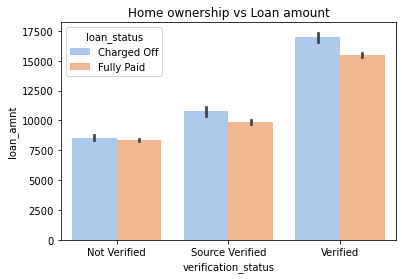

In [72]:
sns.barplot(data =loan,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")
plt.title('Home ownership vs Loan amount')
plt.show()

### Insights:
It can be observed,that,
1. Verified individuals were able to borrow loan of a high amount, in comparision to others


#### Loan amount vs dti

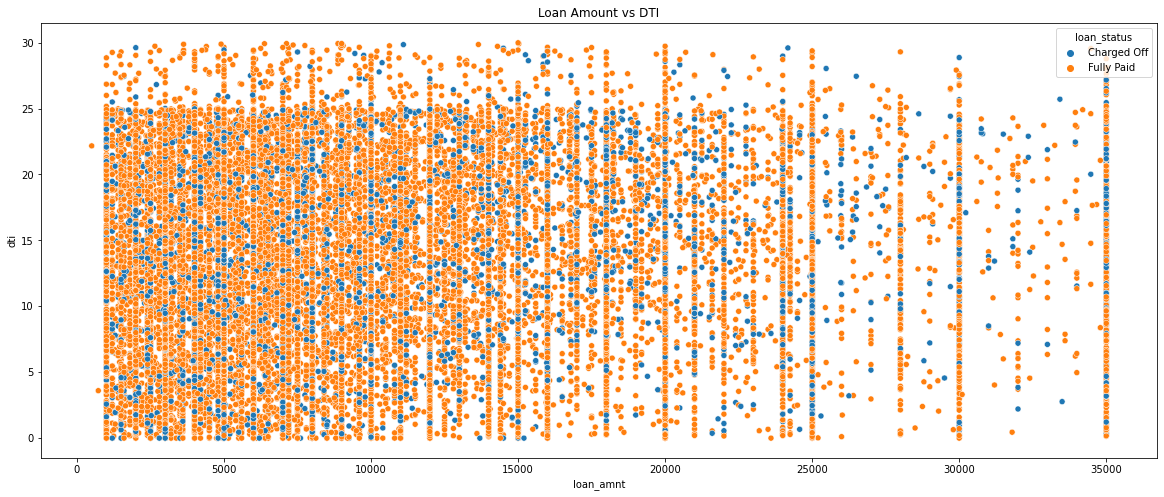

In [73]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='loan_amnt', y='dti', data=loan, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

### Insights:
It can be observed,that,

There is no specific pattern or trend in the plot, hence, no relation can be observed.

#### Interest Rate vs dti 

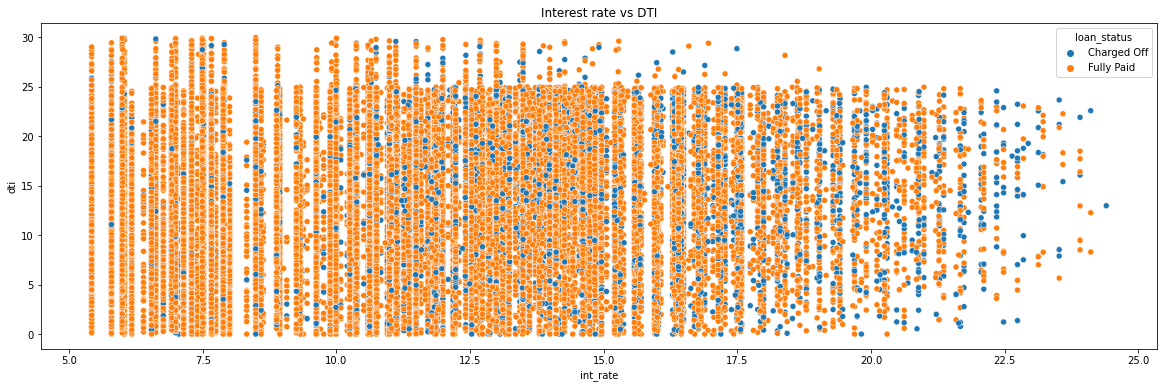

In [74]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=loan, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

### Insights:
It can be observed,that,

There is no specific pattern or trend in the plot, hence, no relation can be observed.

## Correlation between the variables:

The cells that are darker in color indicates a strong relationship between the 2 variables, and the ones with lighter color indicates weak relationship.

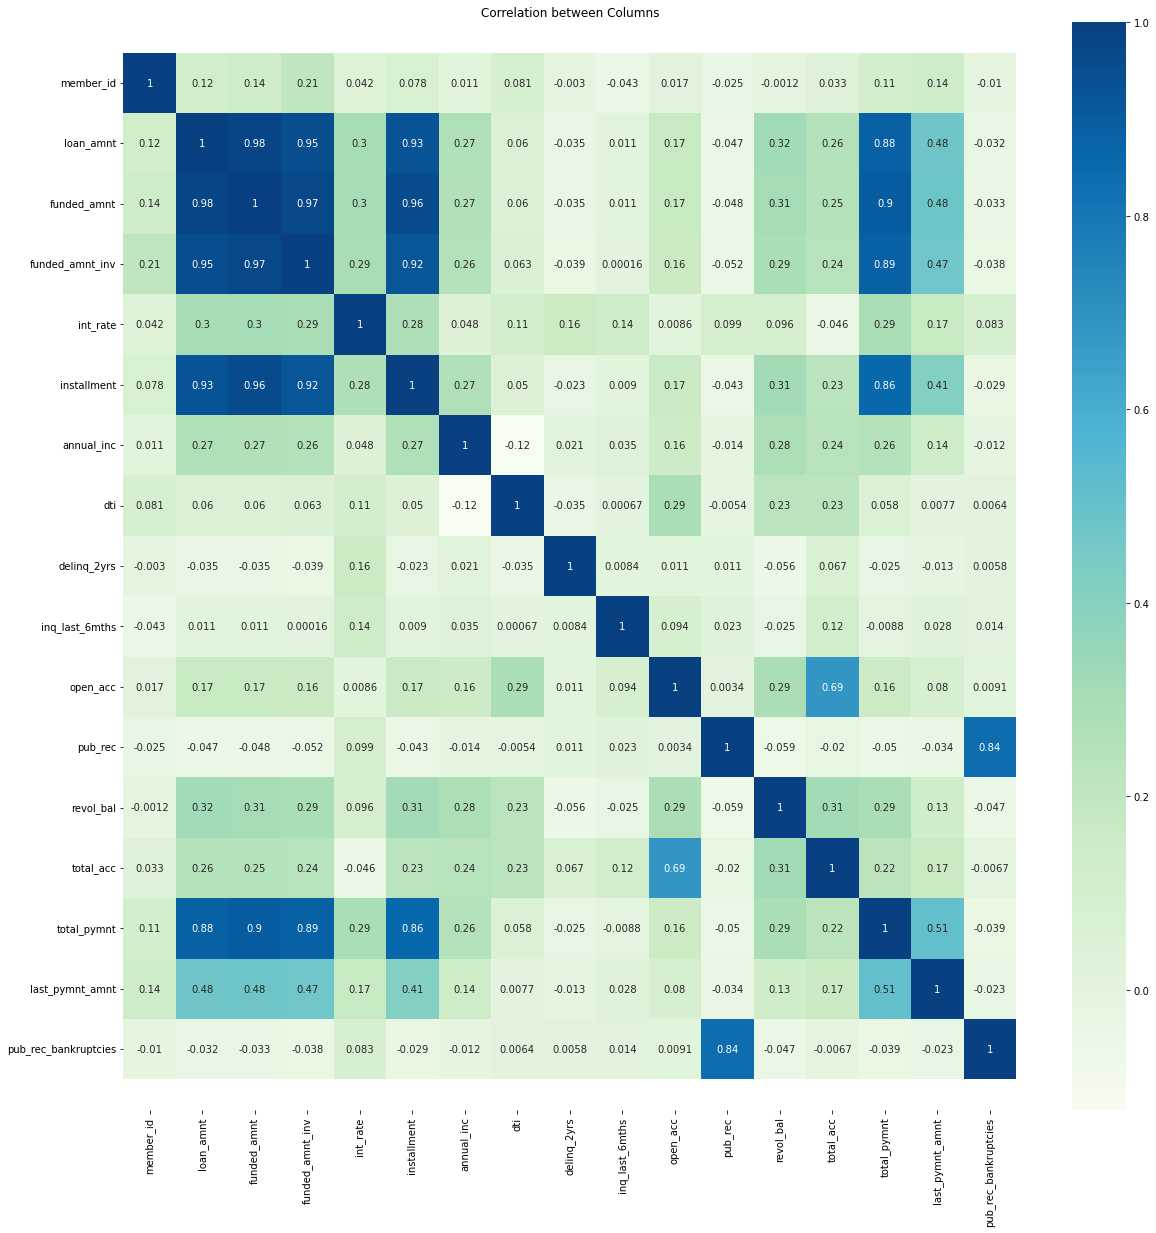

In [75]:
#Finding correlation matric
corr_matrix = loan.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='GnBu')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

### Insights:

It can be observed,that,

1.The Total payment column is highly and positively correlated with installment column.

2.The Total payment column is highly and positively correlated with total amount column.

3.The public derogatory records colummn is highly and positively correlated with public bankruptcies records column

4.A high and positive correlation between Loan amount column and Funded amount suggests that, the amount asked and the amount funded by the lending club are almost same.